# Importing Libraries and Ignoring Warnings

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ignore all warnings
warnings.filterwarnings("ignore")

# Loading and Preparing the Dataset

In [2]:
# Load Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding target column for reference
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Adding species names

# Exploratory Data Analysis (EDA)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


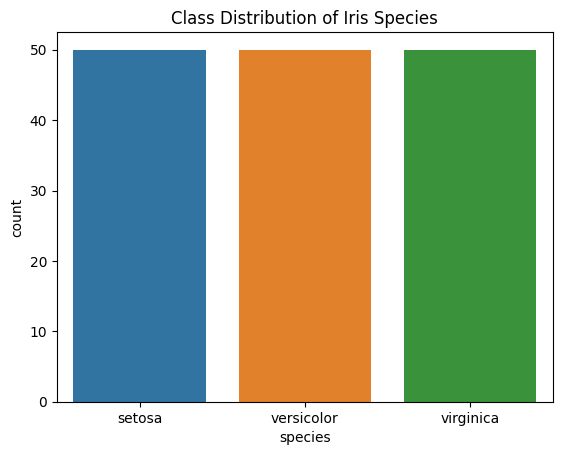

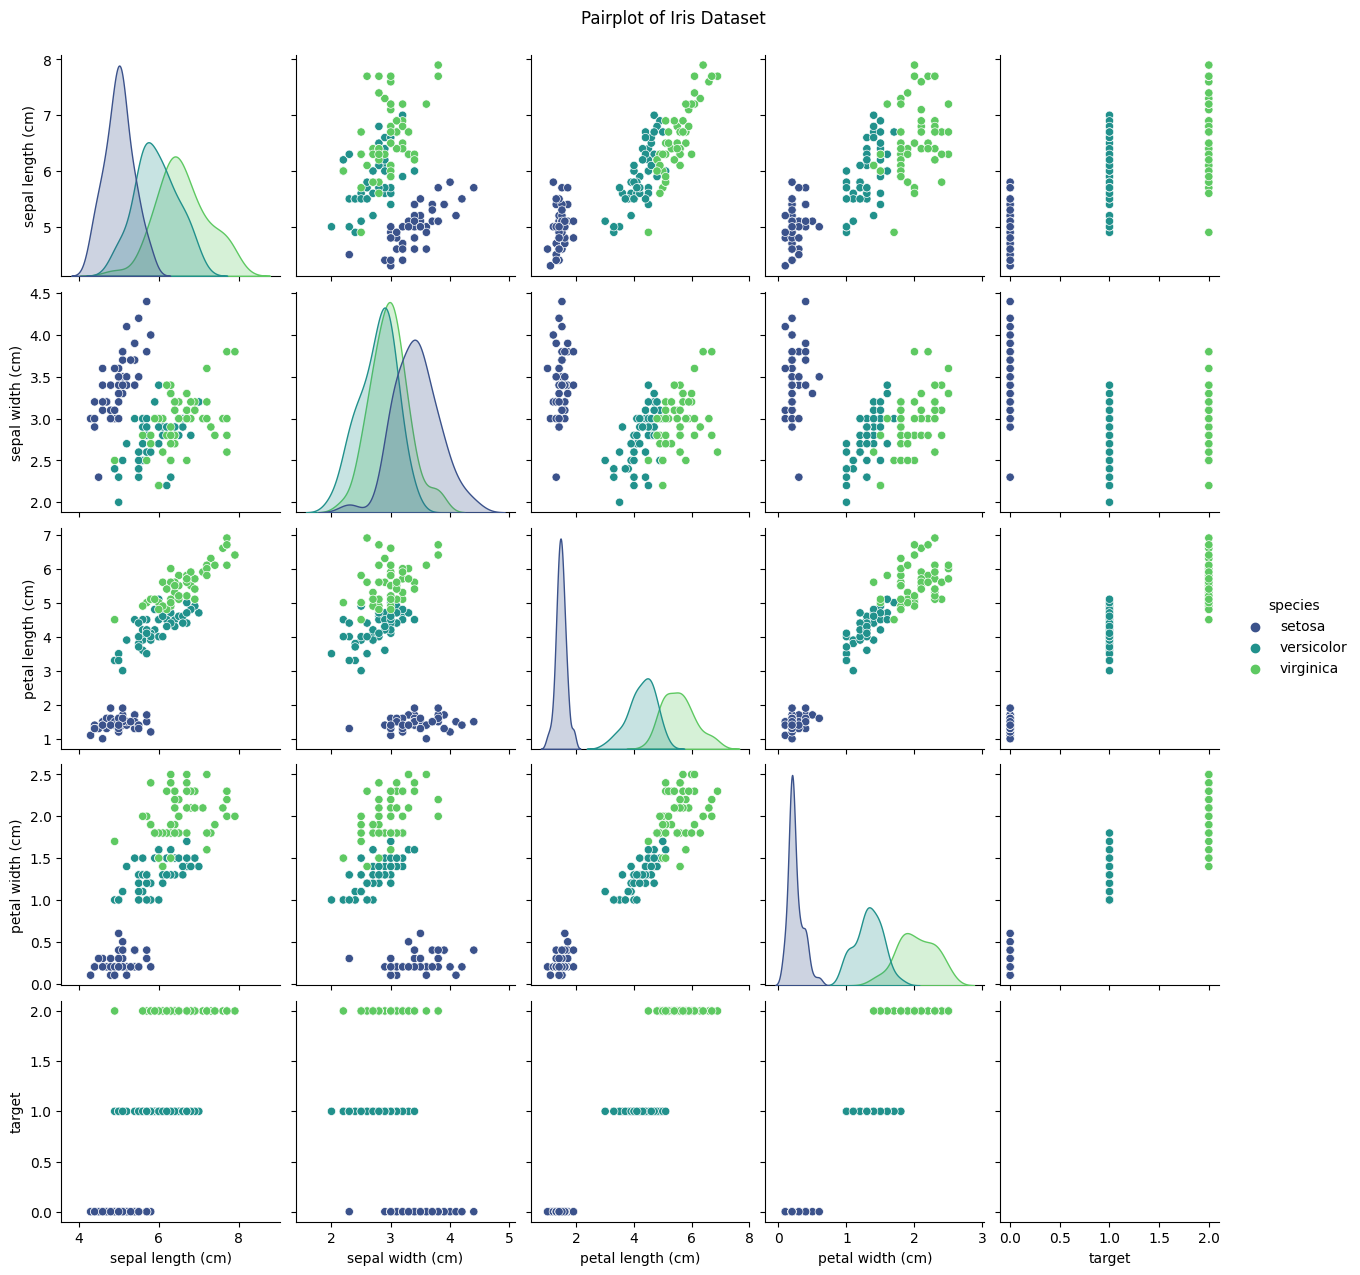

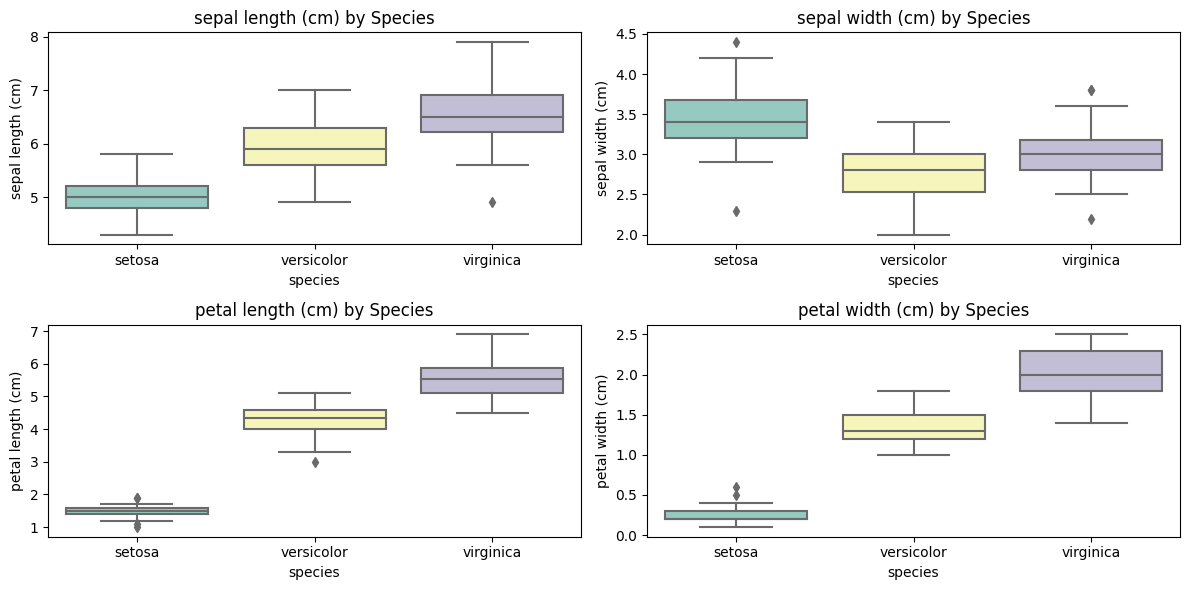

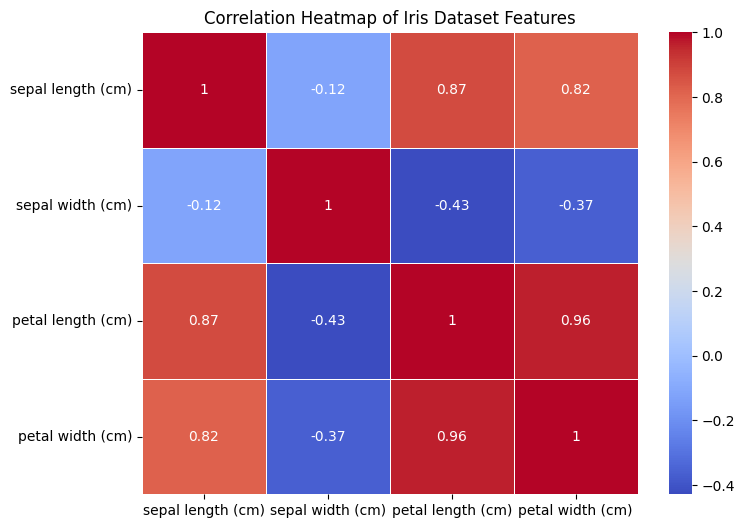

In [3]:
# EDA (Exploratory Data Analysis)
# Summary statistics
print(df.describe())

# Distribution of classes
sns.countplot(x='species', data=df)
plt.title('Class Distribution of Iris Species')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

# Boxplot for each feature by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

# Correlation heatmap (excluding non-numeric columns)
numeric_cols = df.drop(['species', 'target'], axis=1)  # Exclude non-numeric columns
corr_matrix = numeric_cols.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

# Data Splitting and Standardization

In [4]:
# Split data into training and testing sets
X = df.drop(['target', 'species'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (for algorithms like k-NN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Initialization and Hyperparameter Tuning

In [5]:
# Initialize classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier()
clf_lr = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grids for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Split criterion for Decision Tree
    'max_depth': [None, 5, 10, 15],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples required to be a leaf node
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],       # Number of neighbors to consider for k-NN
    'weights': ['uniform', 'distance'],# Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}

param_grid_lr = {
    'C': [0.1, 1.0, 10.0],             # Regularization parameter for Logistic Regression
    'penalty': ['l1', 'l2'],           # Penalty term ('l1' or 'l2')
    'solver': ['liblinear', 'saga']    # Algorithm to use in the optimization problem
}

# GridSearchCV for Model Selection and Evaluation

In [6]:
# Initialize GridSearchCV for each classifier
grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(clf_lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV (finds the best parameters for each classifier using cross-validation)
grid_search_dt.fit(X_train, y_train)
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_lr.fit(X_train_scaled, y_train)

# Get best parameters and best scores from GridSearchCV
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best parameters for Decision Tree:", best_params_dt)
print("Best cross-validation accuracy for Decision Tree:", best_score_dt)

print("Best parameters for k-Nearest Neighbors:", best_params_knn)
print("Best cross-validation accuracy for k-Nearest Neighbors:", best_score_knn)

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best cross-validation accuracy for Logistic Regression:", best_score_lr)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.9583333333333334
Best parameters for k-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy for k-Nearest Neighbors: 0.9583333333333334
Best parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.9583333333333334


# Model Evaluation and Reporting

In [7]:
# Predict with best models
best_dt = grid_search_dt.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_lr = grid_search_lr.best_estimator_

y_pred_dt = best_dt.predict(X_test)
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f'Tuned Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Tuned k-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')
print(f'Tuned Logistic Regression Accuracy: {accuracy_lr:.2f}')

# Classification reports for tuned models
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

print("Tuned k-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))

Tuned Decision Tree Accuracy: 1.00
Tuned k-Nearest Neighbors Accuracy: 1.00
Tuned Logistic Regression Accuracy: 1.00
Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Tuned k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Tuned Logistic Regression Cla